In [1]:
from __future__ import print_function

from tesserocr import PyTessBaseAPI, PSM, PT, RIL, iterate_level
from PIL import Image
import time

In [2]:
import cv2
import numpy as np
from io import BytesIO

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [4]:
!python --version

Python 3.6.9 :: Anaconda, Inc.


In [38]:
imageMAT = Image.open('../datafiles/out12.jpg')

In [ ]:
start = time.time()

with PyTessBaseAPI(path = "C:\\Tesseract\\Tesseract-OCR-v3\\tessdata") as api:
    api.SetImage(imageMAT)
    api.SetVariable("save_blob_choices", "T")
    api.SetVariable('hocr_font_info', '1')
    api.Recognize()
    #pi = api.AnalyseLayout()
    ri = api.GetIterator()
    
    level = RIL.SYMBOL
    for r in iterate_level(ri, level):
        if r:
            TMP = r.GetImage(level, padding= 5, original_image = imageMAT)
            bbox = r.BoundingBox(level)
            temp = r.GetUTF8Text(level)
            #NewTMP = 
            print(bbox)
            print(type(TMP))
            print(TMP)
            #temp2 = ByteIO(TMP[0])
            #emp3 = np.array(TMP[0])
            #cv2.imshow("line-image", temp3)
            TMP[0].show()
            #cv2.waitKey(0)
print("TIME:\t", time.time() - start)

(372, 231, 431, 297)
<class 'tuple'>
(<PIL.JpegImagePlugin.JpegImageFile image mode=L size=69x76 at 0x1ECF65FB860>, 367, 226)
(433, 251, 481, 297)
<class 'tuple'>
(<PIL.JpegImagePlugin.JpegImageFile image mode=L size=58x56 at 0x1ECF660A438>, 428, 246)
(484, 229, 531, 298)
<class 'tuple'>
(<PIL.JpegImagePlugin.JpegImageFile image mode=L size=57x79 at 0x1ECF65FB7F0>, 479, 224)
(535, 271, 561, 278)
<class 'tuple'>
(<PIL.JpegImagePlugin.JpegImageFile image mode=L size=36x17 at 0x1ECF660A438>, 530, 266)
(566, 239, 593, 298)
<class 'tuple'>
(<PIL.JpegImagePlugin.JpegImageFile image mode=L size=37x69 at 0x1ECF65FB898>, 561, 234)
(596, 251, 640, 298)
<class 'tuple'>
(<PIL.JpegImagePlugin.JpegImageFile image mode=L size=54x57 at 0x1ECF660A438>, 591, 246)
(645, 271, 671, 278)
<class 'tuple'>
(<PIL.JpegImagePlugin.JpegImageFile image mode=L size=36x17 at 0x1ECF65FB860>, 640, 266)
(676, 231, 735, 297)
<class 'tuple'>
(<PIL.JpegImagePlugin.JpegImageFile image mode=L size=69x76 at 0x1ECF660A438>, 67

In [ ]:
image = cv2.rectangle(np.array(imageMAT), (372, 231), (431, 297), (0,0,255))
cv2.imshow("test", image)
cv2.waitKey(0)

## Algo_1

In [4]:
IMAGEPATH = '../datafiles/out1.jpg'
PILimage = Image.open(IMAGEPATH)
NUMPYimage = np.array(PILimage, dtype='int16')
print(NUMPYimage.shape, NUMPYimage.dtype)

(3300, 2550) int16


In [84]:
np.amin(NUMPYimage), np.amax(NUMPYimage)

(0, 255)

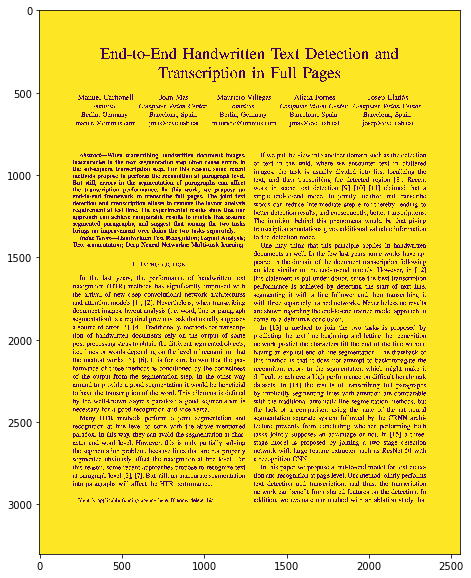

In [125]:
plt.figure(figsize=(20, 10))
plt.imshow(NUMPYimage)
plt.show()

In [106]:
NUMPYimage[200:300].shape

(100, 2550)

In [5]:
with PyTessBaseAPI(path = "C:\\Tesseract\\Tesseract-OCR-v3\\tessdata") as api:
    api.SetImage(PILimage)
    api.Recognize()
    
    ri = api.GetIterator()
    level = RIL.TEXTLINE
    
    Line_BBoxes = []
    for r in iterate_level(ri, level):
        if r:
            bbox = r.BoundingBox(level)
            if bbox:
                Line_BBoxes.append(bbox)
    
    ri = api.GetIterator()
    level = RIL.WORD
    
    for r in iterate_level(ri, level):
        if r:
            bbox = r.BoundingBox(level)
            #print(bbox)
            if bbox: ## Now black (-1) 'em out
                # Word_BBoxes.append(bbox)
                NUMPYimage[bbox[1]:bbox[3], bbox[0]:bbox[2]] = -1

In [79]:
with PyTessBaseAPI(path = "C:\\Tesseract\\Tesseract-OCR-v3\\tessdata") as api:
    api.SetImage(PILimage)
    api.Recognize()
    
    ri = api.GetIterator()
    level = RIL.TEXTLINE
    
    Line_BBoxes = []
    for r in iterate_level(ri, level):
        if r:
            bbox = r.BoundingBox(level)
            if bbox:
                Line_BBoxes.append(bbox)
    
    ri = api.GetIterator()
    level = RIL.WORD
    
    for r in iterate_level(ri, level):
        if r:
            bbox = r.BoundingBox(level)
            if bbox: ## Now black (-1) 'em out
                # Word_BBoxes.append(bbox)
                
                NUMPYimage[bbox[1]:bbox[3], bbox[0]:bbox[2]] = -1
                print("set",bbox[1], bbox[3],bbox[0], bbox[2] ,NUMPYimage[bbox[1]:bbox[3]][bbox[0]:bbox[2]])

set 229 298 372 835 []
set 229 299 873 1368 []
set 231 298 1405 1578 []
set 229 298 1614 1999 []
set 229 298 2038 2178 []
set 345 435 723 1254 []
set 345 413 1291 1366 []
set 345 414 1403 1561 []
set 347 435 1599 1825 []
set 513 545 729 812 []
set 513 545 828 905 []
set 568 605 606 771 []
set 569 597 788 887 []
set 568 597 905 1016 []
set 618 653 667 843 []
set 618 656 861 954 []
set 670 708 664 969 []
set 512 545 236 375 []
set 512 545 393 571 []
set 569 597 331 464 []
set 618 653 256 367 []
set 619 656 385 537 []
set 670 700 222 586 []
set 866 894 243 507 []
set 867 901 525 723 []
set 867 894 740 937 []
set 867 894 956 1113 []
set 867 901 1131 1250 []
set 909 936 204 401 []
set 909 935 416 447 []
set 909 936 462 511 []
set 911 936 527 587 []
set 909 943 603 814 []
set 911 943 829 892 []
set 909 936 908 988 []
set 917 936 1004 1090 []
set 917 936 1106 1203 []
set 909 935 1219 1250 []
set 950 977 204 253 []
set 950 984 270 449 []
set 950 984 464 673 []
set 952 984 690 761 []
set 950 97

In [56]:
NUMPYimage[2956:2986][2284:2346]

array([], shape=(0, 2550), dtype=int16)

In [52]:
(NUMPYimage.dtype)

dtype('int16')

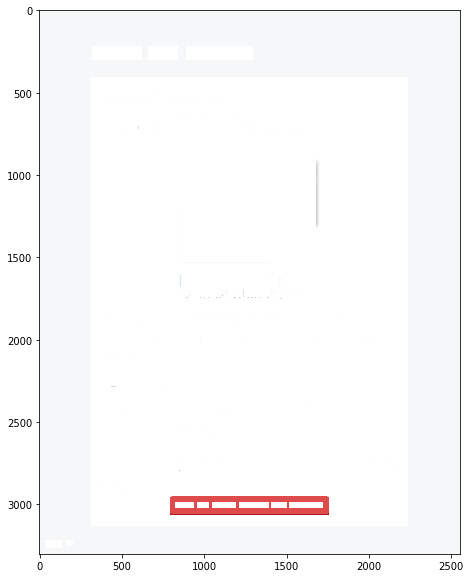

In [87]:
plt.figure (figsize=(20, 10))
plt.imshow(np.uint8(NUMPYimage))
plt.show()

In [12]:
for x1, y1, x2, y2 in Line_BBoxes:
    print(x1, y1, x2, y2)
    cv2.rectangle(np.array(NUMPYimage), (x1, y1), (x2, y2), (155, 155, 155))

372 229 2178 299
723 345 1825 435
729 513 905 545
606 568 1016 605
667 618 954 656
664 670 969 708
236 512 571 545
331 569 464 597
256 618 537 656
222 670 586 700
243 866 1250 901
204 909 1250 943
204 950 1251 984
204 992 1249 1026
204 1033 1251 1067
204 1075 1250 1109
205 1116 1251 1150
205 1158 1249 1192
205 1199 1250 1233
205 1241 1249 1275
205 1282 1249 1316
204 1324 1186 1358
244 1368 1248 1403
205 1410 1237 1444
565 1527 889 1556
246 1609 1250 1647
204 1659 1250 1697
204 1709 1249 1747
205 1759 1249 1797
205 1808 1250 1846
206 1858 1249 1896
205 1908 1248 1946
204 1958 1250 1996
204 2008 1248 2046
204 2057 1250 2095
204 2107 1248 2145
204 2157 1249 2195
205 2207 1249 2245
205 2257 1249 2295
204 2307 1250 2345
204 2356 1249 2394
204 2406 1029 2444
246 2459 1250 2497
204 2509 1250 2547
204 2559 1248 2597
205 2609 1249 2647
204 2659 1249 2697
206 2708 1250 2746
204 2758 1250 2796
205 2808 1249 2846
204 2858 1047 2896
237 2962 1062 2993
1078 512 1408 554
1171 569 1303 597
1095 618 13

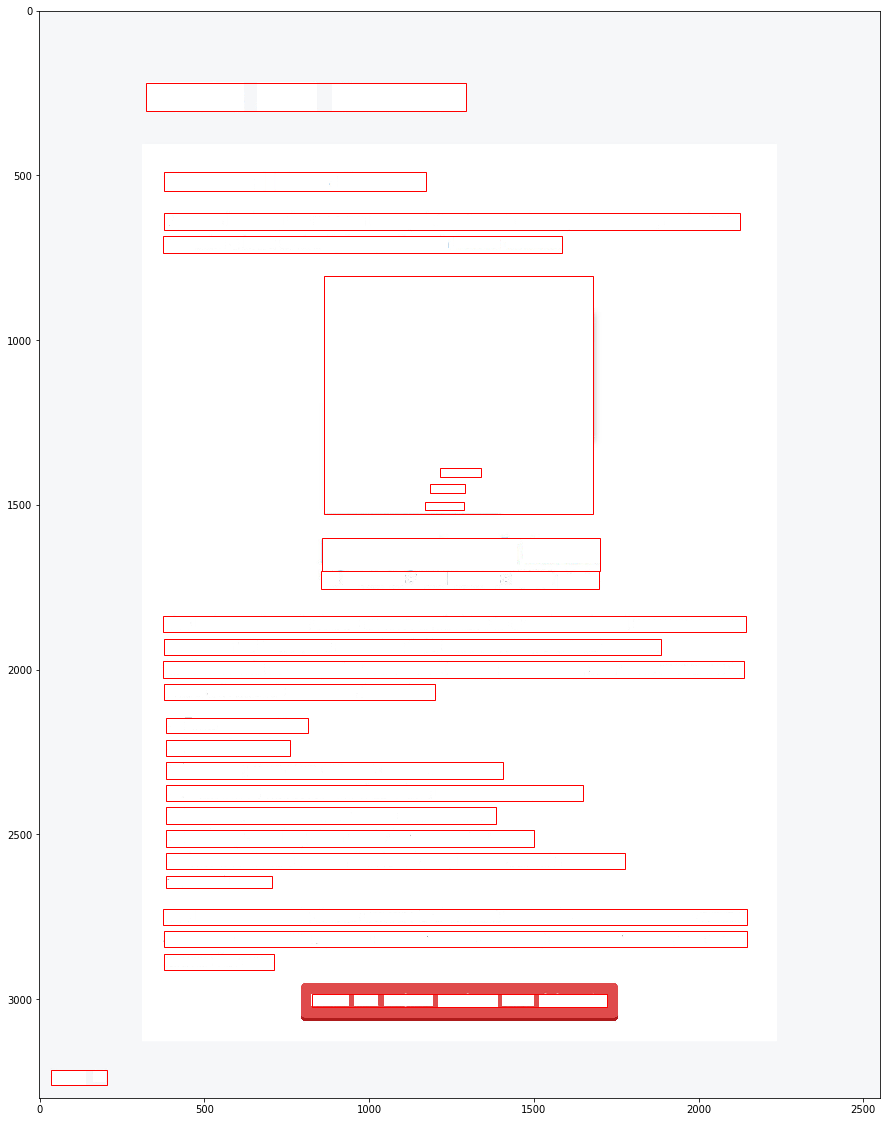

In [88]:
# Create figure and axes
fig, ax = plt.subplots(figsize = (30, 20))

# Display the image
ax.imshow(np.uint8(NUMPYimage))

for x1, y1, x2, y2 in Line_BBoxes:
    # print(x1, y1, x2, y2)
    # Create a Rectangle patch
    rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth = 1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
plt.show()
fig.savefig("interim.png", dpi=fig.dpi)

In [14]:
np.amin(NUMPYimage), np.amax(NUMPYimage)

(-1, 255)

In [89]:
imgCV = cv2.cvtColor(np.uint8(NUMPYimage), cv2.COLOR_RGB2BGR)

In [67]:
imgCV.shape

(3300, 2550, 3)

In [ ]:
imgCV

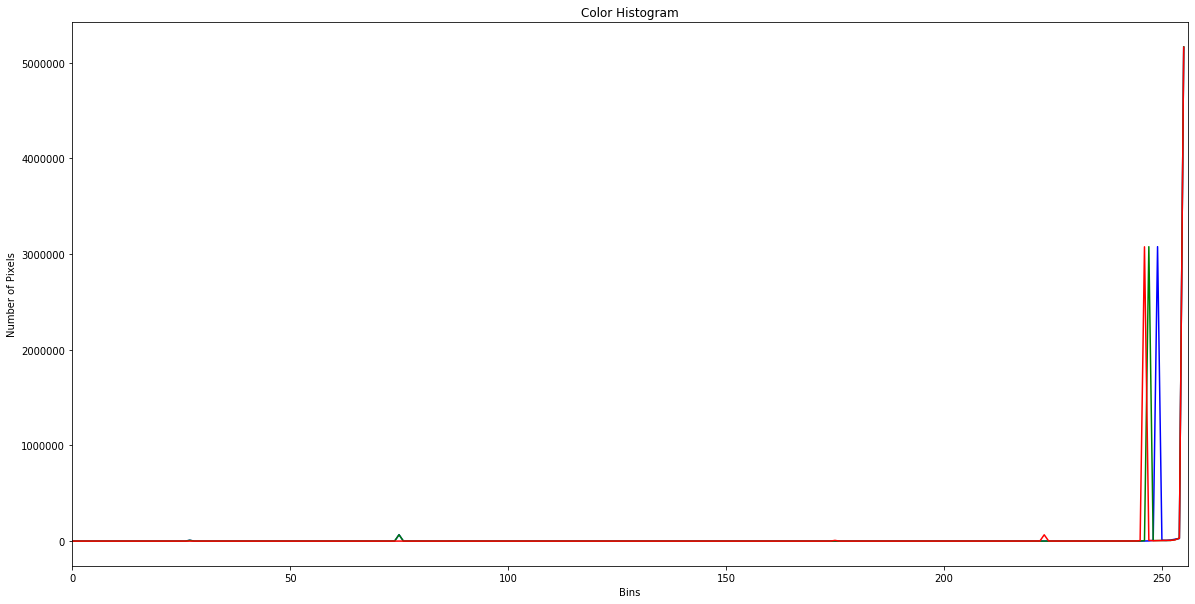

In [104]:
#img = cv2.imread(IMAGEPATH)    # Load the image 

channels = cv2.split(imgCV)       # Set the image channels
colors = ("b", "g", "r")        # Initialize tuple
plt.figure(figsize=(20,10))
plt.title("Color Histogram")
plt.xlabel("Bins")
plt.ylabel("Number of Pixels")

hist = []
for (i, col) in zip(channels, colors):       # Loop over the image channels
    #print(i, col)
    hist.append(cv2.calcHist([i], [0], None, [256], [0, 256]))   # Create a histogram for current channel
    plt.plot(hist[-1], color = col)      # Plot the histogram
    plt.xlim([0, 256])

In [109]:
np.where(hist[0] == np.amax(hist[0]))

(array([255], dtype=int64), array([0], dtype=int64))

In [110]:
np.where(hist[1] == np.amax(hist[1]))

(array([255], dtype=int64), array([0], dtype=int64))

In [111]:
np.where(hist[2] == np.amax(hist[2]))

(array([255], dtype=int64), array([0], dtype=int64))

In [71]:
len(channels)

3

[[249 249 249 ... 249 249 249]
 [249 249 249 ... 249 249 249]
 [249 249 249 ... 249 249 249]
 ...
 [249 249 249 ... 249 249 249]
 [249 249 249 ... 249 249 249]
 [249 249 249 ... 249 249 249]] b


(0, 256)

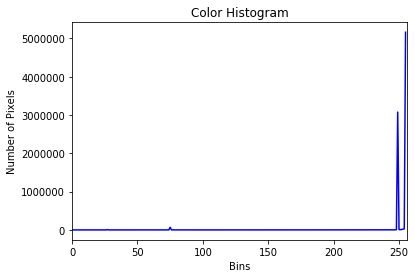

In [91]:
#img = cv2.imread(IMAGEPATH)    # Load the image 

channels = cv2.split(imgCV)       # Set the image channels
colors = ("b", "g", "r")        # Initialize tuple 
plt.figure()
plt.title("Color Histogram")
plt.xlabel("Bins")
plt.ylabel("Number of Pixels")

(i, col) = (channels[0], colors[0])       # Loop over the image channels
print(i, col)
hist = cv2.calcHist([i], [0], None, [256], [0, 256])   # Create a histogram for current channel
plt.plot(hist, color = col)      # Plot the histogram
plt.xlim([0, 256])

[[247 247 247 ... 247 247 247]
 [247 247 247 ... 247 247 247]
 [247 247 247 ... 247 247 247]
 ...
 [247 247 247 ... 247 247 247]
 [247 247 247 ... 247 247 247]
 [247 247 247 ... 247 247 247]] g


(0, 256)

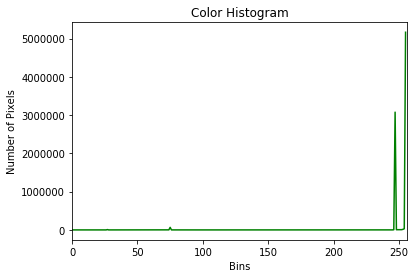

In [92]:
#img = cv2.imread(IMAGEPATH)    # Load the image 

channels = cv2.split(imgCV)       # Set the image channels
colors = ("b", "g", "r")        # Initialize tuple 
plt.figure()
plt.title("Color Histogram")
plt.xlabel("Bins")
plt.ylabel("Number of Pixels")

(i, col) = (channels[1], colors[1])       # Loop over the image channels
print(i, col)
hist = cv2.calcHist([i], [0], None, [256], [0, 256])   # Create a histogram for current channel
plt.plot(hist, color = col)      # Plot the histogram
plt.xlim([0, 256])

[[246 246 246 ... 246 246 246]
 [246 246 246 ... 246 246 246]
 [246 246 246 ... 246 246 246]
 ...
 [246 246 246 ... 246 246 246]
 [246 246 246 ... 246 246 246]
 [246 246 246 ... 246 246 246]] r


(0, 256)

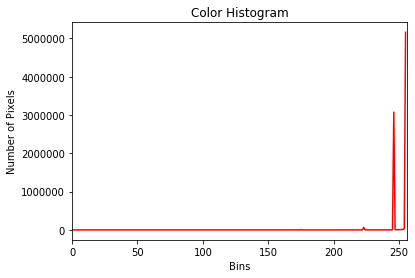

In [93]:
#img = cv2.imread(IMAGEPATH)    # Load the image 

channels = cv2.split(imgCV)       # Set the image channels
colors = ("b", "g", "r")        # Initialize tuple 
plt.figure()
plt.title("Color Histogram")
plt.xlabel("Bins")
plt.ylabel("Number of Pixels")

(i, col) = (channels[2], colors[2])       # Loop over the image channels
print(i, col)
hist = cv2.calcHist([i], [0], None, [256], [0, 256])   # Create a histogram for current channel
plt.plot(hist, color = col)      # Plot the histogram
plt.xlim([0, 256])

In [103]:
np.where(hist == np.amax(hist))

(array([255], dtype=int64), array([0], dtype=int64))

In [115]:
hist[0].T.shape

(1, 256)

In [116]:
bg = np.dot(hist[0], hist[1].T)

In [117]:
bg.shape

(256, 256)

In [122]:
hist[0][255], hist[1][255], hist[0][255] *hist[1][255]

(array([5162131.], dtype=float32),
 array([5165224.], dtype=float32),
 array([2.6663564e+13], dtype=float32))

In [120]:
bg[255][255]

26663564000000.0

In [123]:
NUMPYimage.size

25245000